In [1]:
# загружаю библиотеки

import os
import pandas as pd
import numpy as np
import re
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #графики в 3D

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from scipy.stats import mannwhitneyu
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from  more_itertools import unique_everseen
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Гипотезы:  
1) Показатель Global Innovation Index коррелирует с Gross Natural Income (GNI). Будем считать наличие кореляции, если pvalue теста Mann–Whitney буде менее 0.05.  
2) Gross Natural Income (GNI) коррелирует с показателями государственной поддержкой экономики. Будем считать наличие кореляции, если pvalue теста Mann–Whitney будет < __0.05__.

### Диверсированные показателями государственной поддержкой экономики:

Я выбрал 37 показателей, которые могут характеризовать государственную поддержку и 5 интегральных позателей:

___1.1.	Political environment (интегральный покозатель)___  
1.1.1.	Political stability and absence of violence/terrorism  
1.1.2.	Government effectiveness  
1.1.3.	Press freedom  

___1.2.	Regulatory environment (интегральный покозатель)___  
1.2.1.	Regulatory quality  
1.2.2.	Rule of law  
1.2.3.	Cost of redundancy dismissal  

___1.3.	Business environment (интегральный покозатель)___  
1.3.1.	Ease of starting a business  
1.3.2.	Ease of resolving insolvency  
1.3.3.	Ease of paying taxes  

2.1.1.	Expenditure on education  
2.1.2.	Public expenditure on education per pupil  

2.1.5.	Pupil-teacher ratio, secondary  

2.2.1.	Tertiary enrolment  
2.2.2.	Graduates in science and engineering  

2.3.1.	Researchers  
2.3.2.	Gross expenditure on R&D (GERD)  

3.1.3.	Government's online service  

3.2.1.	Electricity output  
3.2.3.	Logistics performance  

3.3.2.	Environmental performance  


___4.1.	Credit (интегральный покозатель)___  
4.1.1.	Ease of getting credit  
4.1.2.	Domestic credit to private sector  
4.1.3.	Microfinance institutions' gross loan portfolio  

4.2.1.	Ease of protecting investors  

4.2.4.	Venture capital deals  

4.3.2.	Market access for non-agricultural exports  
4.3.3.	Intensity of local competition  

5.1.2.	Firms offering formal training  

___5.2.	Innovation linkages (интегральный покозатель)___   
5.2.1.	University/industry research collaboration  
5.2.2.	State of cluster development  
5.2.3.	GERD financed by abroad  
5.2.4.	Joint venture/strategic alliance deals  
5.2.5.	Patent families filed in at least three offices  

5.3.1.	Royalties and license fees payments (% of service imports)  
5.3.4.	Foreign direct investment net inflows  

6.1.2.	Patent Cooperation Treaty resident applications  

6.3.4.	Foreign direct investment net outflows

### Интегральные показатели
1.1 Political environment  
1.2 Regulatory environment  
1.3 Business environment  
4.1 Credit  
5.2 Innovation linkages

# Исследование датасета

Построить графики:  
1) индекс GII по годам и регионам - кластеризация  
2) индекс GII по годам  
3) интегральные признаки по регионам  

In [2]:
#загружаю датасет из файла
with open("C://Users//dserp//ML//Degree_ML//dataset_GW.pickle", 'rb') as f:
    dataset = pickle.load(f)
f.close()

In [3]:
dataset['GII'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2013 to region
Columns: 141 entries, Albania to Zimbabwe
dtypes: object(141)
memory usage: 8.9+ KB


In [4]:
dataset['GII'].T.describe()

2013   2014   2015   2016   2017   2018   2019        region
count   141.0  141.0  141.0  141.0  141.0  141.0  141.0           141
unique  141.0  137.0  137.0  136.0  136.0  136.0  136.0            20
top     142.0  102.0  102.0  111.0  102.0  102.0  102.0  Western Asia
freq      1.0    2.0    2.0    2.0    2.0    2.0    2.0            15

## Индекс GII по годам и регионам

In [5]:
range_country = dataset['region']['region'].value_counts()
print(' Всего стран:',len(dataset['region'].index),  'В', len(range_country.index), 'регионах')

 Всего стран: 224 В 22 регионах


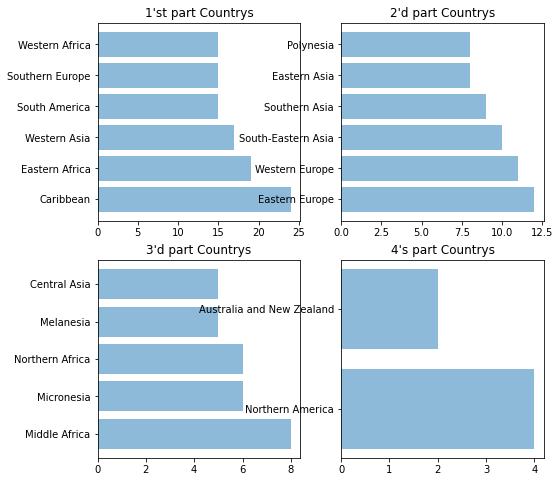

In [6]:
gridsize = (2, 2)
fig1, ax1 = plt.subplots(2,2, figsize = [8,8])
ax1 = ax1.flatten()

ax1[0] = plt.subplot2grid(gridsize, (0, 0))
ax1[0].barh(range_country.index[0:6], dataset['region']['region'].value_counts()[0:6], align='center', alpha=0.5)
ax1[0].set_title("1'st part Countrys")

ax1[1] = plt.subplot2grid(gridsize, (0, 1))
ax1[1].barh(range_country.index[7:13], dataset['region']['region'].value_counts()[7:13], align='center', alpha=0.5)
ax1[1].set_title("2'd part Countrys")

ax1[2] = plt.subplot2grid(gridsize, (1, 0))
ax1[2].barh(range_country.index[14:19], dataset['region']['region'].value_counts()[14:19], align='center', alpha=0.5)
ax1[2].set_title("3'd part Countrys")

ax1[3] = plt.subplot2grid(gridsize, (1, 1))
ax1[3].barh(range_country.index[20:22], dataset['region']['region'].value_counts()[20:22], align='center', alpha=0.5)
ax1[3].set_title("4's part Countrys")

plt.show()

In [7]:
#подсчёт количества стран
reg_count = {}
reg_count = dataset['GII'].iloc[[7]].T['region'].value_counts()[:22]
reg_count

Western Asia                 15
Western Africa               12
Southern Europe              12
Eastern Europe               11
Eastern Africa               11
South America                11
Northern Europe              10
Central America               8
South-Eastern Asia            8
Western Europe                7
Southern Asia                 6
Eastern Asia                  5
Northern Africa               5
Southern Africa               4
Central Asia                  4
Caribbean                     4
Middle Africa                 3
Northern America              2
Australia and New Zealand     2
Melanesia                     1
Name: region, dtype: int64

In [8]:
#создаю датафрам с суммой gii по регионама и годам
ds_gii_sum = dataset['GII'].iloc[[0,7], :].T.groupby('region').sum().reset_index()
for i  in range(1,7):
    ds_gii_sum = ds_gii_sum.merge(dataset['GII'].iloc[[i,7], :].T.groupby('region').sum().reset_index(), how = 'left')
ds_gii_sum.fillna(0, inplace = True)
ds_gii_sum = ds_gii_sum.iloc[:22]
ds_gii_sum = ds_gii_sum.rename(index = ds_gii_sum['region'])
ds_gii_sum.drop('region', axis = 1, inplace = True)
ds_gii_sum.drop(2019, axis = 1, inplace = True)

#усреднение gii на 1 страну в реионе
for reg in ds_gii_sum.index:
    ds_gii_sum.loc[reg] /= reg_count[reg]
ds_gii_sum

2013        2014        2015        2016  \
Australia and New Zealand   18.000000   17.500000   16.000000   18.000000   
Caribbean                   72.250000   74.000000   75.500000   72.583333   
Central America             85.875000   89.500000   89.375000   86.750000   
Central Asia               108.750000  114.000000  106.750000   97.916667   
Eastern Africa             112.272727  105.636364  105.909091   98.151515   
Eastern Asia                30.800000   26.400000   27.800000   24.200000   
Eastern Europe              49.272727   47.454545   46.000000   46.454545   
Melanesia                   97.000000   95.000000  115.000000  102.333333   
Middle Africa              123.666667  120.000000  113.666667  119.666667   
Northern Africa            109.800000  109.000000  104.200000  102.133333   
Northern America             8.000000    9.000000   10.500000    9.500000   
Northern Europe             15.700000   15.800000   15.600000   15.400000   
South America               74.272727   82.454545   83.545455   81.303030   
South-Eastern Asia          66.500000   67.500000   62.250000   61.250000   
Southern Africa            107.000000  111.000000  109.500000  105.166667   
Southern Asia              112.000000  116.666667  111.166667   97.666667   
Southern Europe             42.916667   46.583333   43.666667   45.916667   
Western Africa             118.000000  116.083333  116.708333  114.638889   
Western Asia                70.066667   70.133333   71.466667   68.200000   
Western Europe              13.714286   13.285714   12.857143   13.285714   

                                 2017        2018  
Australia and New Zealand   22.000000   21.000000  
Caribbean                   73.916667   76.416667  
Central America             87.812500   89.312500  
Central Asia                98.666667   99.166667  
Eastern Africa             102.636364  103.218182  
Eastern Asia                23.000000   21.800000  
Eastern Europe              46.545455   45.363636  
Melanesia                  102.333333  102.333333  
Middle Africa              119.333333  117.333333  
Northern Africa            100.133333   97.733333  
Northern America            11.000000   12.000000  
Northern Europe             16.100000   17.200000  
South America               79.939394   81.212121  
South-Eastern Asia          59.250000   56.500000  
Southern Africa            105.916667  105.416667  
Southern Asia               93.500000   90.500000  
Southern Europe             45.750000   46.250000  
Western Africa             114.388889  115.388889  
Western Asia                68.800000   70.000000  
Western Europe              12.428571   12.714286

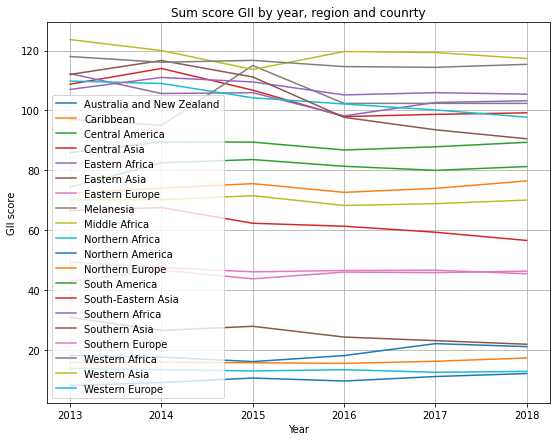

In [9]:
plt.figure(figsize = [9,7])
plt.title('Sum score GII by year, region and counrty')
plt.xlabel('Year')
plt.ylabel('GII score')
plt.grid(axis = 'both')
plt.plot(ds_gii_sum.T)
plt.legend(ds_gii_sum.index)
plt.show()

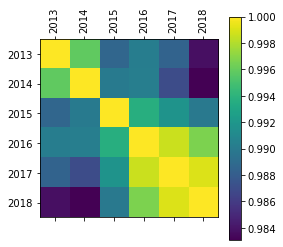

In [10]:
#матрица корреляции GII по годам
f = plt.figure(figsize=(4, 4))
plt.matshow(ds_gii_sum.corr(method ='pearson'), fignum=f.number)
plt.xticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10, rotation=90)
plt.yticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix GII', fontsize=16)

## Исследую интегральные показатели

In [11]:
integer_fe = dataset['integr_fe']

#подготавливаю датасет интегральных показателей: добавляю регион, удаляю не нужные столбцы
for i in integer_fe.keys():
    #переимменовываю индесы по столбцу 'Indicator'
    integer_fe[i] = integer_fe[i].rename(index = integer_fe[i]['Indicator'])
    
    # удаляю столюцы 'Indicator' и '201*'
    integer_fe[i].drop(['Indicator'], axis = 1, inplace = True)
    integer_fe[i].drop([list(integer_fe[i])[0]], axis = 1, inplace = True)

In [12]:
#добавляю регион
for df_name in integer_fe.keys():
    integer_fe[df_name] = integer_fe[df_name].append(pd.Series(None, name='region'))
    for i in list(dataset['region']['country']):
            try:
                integer_fe[df_name][i].region = list(dataset['region']['region'].loc[dataset['region']['country'] == i])[0]
            except: pass

D:\Program_Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Program_Files\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Program_Files\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
# pandas в некоторых датасетах не видит числа. Этот код преобразует object в числа
for ds in integer_fe.keys():
    integer_fe[ds].iloc[:4] = integer_fe[ds].iloc[:4].apply(pd.to_numeric, errors='coerce')

In [14]:
#сумма integral fe по регионам и годам на 1 страну в регионе
sum_int_fe = {}
for ds in integer_fe.keys():
    group_intfe = integer_fe[ds].T.groupby('region').sum().reset_index()
    for fe in range(len(list(group_intfe)[1:])-1):
        ife = integer_fe[ds].iloc[[fe, 5]].T.groupby('region').sum().reset_index().iloc[:,1]
        cfe = integer_fe[ds].T.groupby('region').count().reset_index().iloc[:,1]
        group_intfe.iloc[:,fe + 1] = ife / cfe
    sum_int_fe[ds] = group_intfe    

#### Загружаю датасет с GNI и GII по странам с 2013 по 2019 гг.

In [15]:
gni_wb = dataset['GNI']
gni_wb

Aruba        Angola       Albania  United Arab Emirates  \
2013  2.537095e+09  1.268098e+11  1.299652e+10          3.905705e+11   
2014  2.662514e+09  1.368623e+11  1.335045e+10          4.037961e+11   
2015  2.794804e+09  1.102861e+11  1.152102e+10          3.598777e+11   
2016  2.830726e+09  9.585017e+10  1.205434e+10          3.591417e+11   
2017  2.885754e+09  1.146182e+11  1.305373e+10          3.883829e+11   
2018  2.794804e+09  9.352368e+10  1.512983e+10          4.236391e+11   
2019  2.794804e+09  8.719892e+10  1.512160e+10          4.232008e+11   

         Argentina       Armenia  Antigua and Barbuda     Australia  \
2013  5.388603e+11  1.180401e+10         1.142788e+09  1.536980e+12   
2014  5.147058e+11  1.213173e+10         1.185965e+09  1.429083e+12   
2015  5.826447e+11  1.098175e+10         1.263884e+09  1.324064e+12   
2016  5.453392e+11  1.079129e+10         1.328013e+09  1.180244e+12   
2017  6.263150e+11  1.193483e+10         1.400095e+09  1.293973e+12   
2018  5.012443e+11  1.261910e+10         1.527959e+09  1.389127e+12   
2019  4.323023e+11  1.390079e+10         1.628059e+09  1.346629e+12   

           Austria    Azerbaijan  ...  United States of America    Uzbekistan  \
2013  4.312288e+11  7.003672e+10  ...              1.717590e+13  6.931948e+10   
2014  4.425787e+11  7.266244e+10  ...              1.805749e+13  7.777239e+10   
2015  3.780581e+11  5.104664e+10  ...              1.870432e+13  8.327094e+10   
2016  3.951979e+11  3.539543e+10  ...              1.904516e+13  8.271051e+10   
2017  4.145994e+11  3.910606e+10  ...              1.983028e+13  6.037083e+10   
2018  4.542580e+11  4.465335e+10  ...              2.083735e+13  5.189966e+10   
2019  4.459123e+11  4.598663e+10  ...              2.162500e+13  5.879469e+10   

      Saint Vincent and the Grenadines       Vietnam       Vanuatu  \
2013                      7.174866e+08  1.638848e+11  7.969825e+08   
2014                      6.978554e+08  1.773606e+11  8.198440e+08   
2015                      7.371804e+08  1.833205e+11  7.618370e+08   
2016                      7.691900e+08  1.966866e+11  8.022217e+08   
2017                      7.865489e+08  2.069165e+11  8.691737e+08   
2018                      8.031151e+08  2.280568e+11  9.145894e+08   
2019                      8.187931e+08  2.422738e+11  9.259626e+08   

             Samoa        Kosovo         Yemen        Zambia      Zimbabwe  
2013  7.425405e+08  7.236587e+09  3.859962e+10  2.689667e+10  1.721342e+10  
2014  7.271251e+08  7.548252e+09  4.058679e+10  2.659869e+10  1.764328e+10  
2015  7.722542e+08  6.545821e+09  3.562176e+10  2.083134e+10  1.798077e+10  
2016  7.807764e+08  6.800975e+09  2.808468e+10  2.030766e+10  1.877295e+10  
2017  8.053038e+08  7.393009e+09  2.456133e+10  2.472343e+10  2.007960e+10  
2018  7.904918e+08  8.076835e+09  2.757889e+10  2.659825e+10  2.270665e+10  
2019  8.133550e+08  8.092812e+09  3.185322e+10  2.276668e+10  1.983585e+10  

[7 rows x 180 columns]

In [16]:
gii = dataset['GII'].drop(index = 'region', axis  = 1)
gii = gii.astype('float')
gii

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013     93.0    138.0   135.0       56.0     59.0       19.0     23.0   
2014     94.0    133.0   135.0       70.0     65.0       17.0     20.0   
2015     87.0    126.0   120.0       72.0     61.0       17.0     18.0   
2016     92.0    113.0   130.0       81.0     60.0       19.0     20.0   
2017     93.0    108.0   130.0       76.0     59.0       23.0     20.0   
2018     83.0    110.0   130.0       80.0     68.0       20.0     21.0   
2019     83.0    113.0   130.0       73.0     64.0       22.0     21.0   

      Azerbaijan  Bahrain  Bangladesh  ...  United Arab Emirates  \
2013       105.0     67.0       130.0  ...             38.000000   
2014       101.0     62.0       129.0  ...             36.000000   
2015        93.0     59.0       129.0  ...             47.000000   
2016        85.0     57.0       117.0  ...             41.000000   
2017        82.0     66.0       114.0  ...             35.000000   
2018        82.0     72.0       116.0  ...             38.000000   
2019        84.0     78.0       116.0  ...             39.166667   

      United Kingdom  United States of America  Uruguay  Uzbekistan  \
2013             3.0                       5.0     52.0  133.000000   
2014             2.0                       6.0     72.0  128.000000   
2015             2.0                       5.0     68.0  122.000000   
2016             3.0                       4.0     62.0  127.666667   
2017             5.0                       4.0     67.0  127.666667   
2018             4.0                       6.0     62.0  127.666667   
2019             5.0                      36.0     62.0  127.666667   

      Venezuela  Vietnam  Yemen  Zambia    Zimbabwe  
2013      114.0     76.0  142.0   118.0  132.000000  
2014      122.0     71.0  141.0   121.0  130.000000  
2015      132.0     52.0  137.0   124.0  133.000000  
2016      120.0     59.0  128.0   125.0  131.666667  
2017      122.0     47.0  127.0   124.0  121.000000  
2018      122.0     45.0  126.0   120.0  113.000000  
2019      122.0     42.0  129.0   124.0  122.000000  

[7 rows x 141 columns]

## Проверяю гипотезы

### u-test the Mann-Whitney для GII и GNI

In [17]:
errlog_giigni_u = list() #пременная для отлова пустых столбщов из-за не несовпадения названий
utest_gii_gni = pd.DataFrame(data = None, columns = list(gni_wb), index = ['statistic','pvalue'])
for col in utest_gii_gni.columns:
    try:
        utest_gii_gni.loc['statistic', col] = mannwhitneyu(gii[col], gni_wb[col]).statistic
        utest_gii_gni.loc['pvalue', col] = mannwhitneyu(gii[col], gni_wb[col]).pvalue
    except: errlog_giigni_u.append(col)

nulls = utest_gii_gni.isnull().sum()
nulls[nulls > 0]  

Aruba                                           2
Antigua and Barbuda                             2
Burundi                                         2
Commonwealth of The Bahamas                     2
Bhutan                                          2
Comoros                                         2
Cuba                                            2
Curaçao                                         2
Cayman Islands                                  2
Djibouti                                        2
Dominica                                        2
Equatorial Guinea                               2
Grenada                                         2
Haiti                                           2
Isle of Man                                     2
Iraq                                            2
Kiribati                                        2
Saint Kitts and Nevis                           2
Liberia                                         2
Libya                                           2


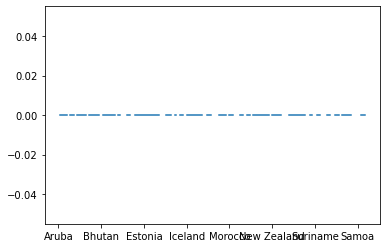

In [18]:
utest_gii_gni.loc['statistic'].plot()

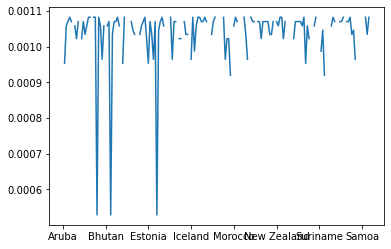

In [19]:
utest_gii_gni.loc['pvalue'].plot()

По всем странам pvalue << меньше порогового значения __0.05__, чититаем, что данные коррелируют и есть взаимосвязь, следовательно, можно приступать к анализу показателей.

### u-test the Mann-Whitney для интегральных показателей и GNI

In [20]:
mean_int_fe = pd.DataFrame(data = None, columns = list(gni_wb), index = list(gni_wb.index))

i = 0
for ds in dataset['integr_fe'].keys():
    mean_int_fe.iloc[i] = dataset['integr_fe'][ds].drop('region').mean()
    i += 1
mean_int_fe

Aruba Angola Albania United Arab Emirates Argentina Armenia  \
2013   NaN    132    80.6                 32.6     107.8    62.2   
2014     0  124.6    85.8                 32.4     114.4    64.6   
2015     0  128.4    79.6                 29.4     113.4    57.4   
2016    76      0      79                 28.2     107.2    64.2   
2017   NaN    NaN    71.2                 29.4     107.8      64   
2018   NaN    NaN      70                 32.6      98.8    72.2   
2019   NaN    NaN     NaN                  NaN      97.2     NaN   

     Antigua and Barbuda Australia Austria Azerbaijan  ...  \
2013                 NaN      17.4    16.2         99  ...   
2014                   0      19.4    18.2       95.6  ...   
2015                   0      16.2    20.4       93.6  ...   
2016                  76        17    21.8       81.4  ...   
2017                 NaN      20.2    21.8       76.6  ...   
2018                 NaN      18.4    23.2       73.2  ...   
2019                 NaN      16.2    21.8        NaN  ...   

     United States of America Uzbekistan Saint Vincent and the Grenadines  \
2013                       12      120.8                              NaN   
2014                     15.6        119                                0   
2015                       12      107.4                                0   
2016                       13          0                               76   
2017                       12        NaN                              NaN   
2018                     10.6        NaN                              NaN   
2019                      NaN        NaN                              NaN   

     Vietnam Vanuatu Samoa Kosovo  Yemen Zambia Zimbabwe  
2013    90.8     NaN   NaN    NaN  129.8   93.6    122.4  
2014    94.2       0     0      0  128.2   86.6      114  
2015    90.4       0     0      0  120.6   87.4    123.2  
2016    87.2      76    76     76  122.8   91.2        0  
2017    78.4     NaN   NaN    NaN  118.2   92.2      113  
2018    71.4     NaN   NaN    NaN    122   94.8    115.4  
2019     NaN     NaN   NaN    NaN  101.8    NaN      NaN  

[7 rows x 180 columns]

In [21]:
nulls = mean_int_fe.isnull().sum()
print('Количество стран в датсете с пропусками:', len(nulls), '\n')
print('Страны с пропущенными значениями более 3:')
print(nulls[nulls > 3])

Количество стран в датсете с пропусками: 180 

Страны с пропущенными значениями более 3:
Aruba                                           4
Antigua and Barbuda                             4
Commonwealth of The Bahamas                     4
Bhutan                                          4
Comoros                                         4
Cuba                                            4
Curaçao                                         4
Cayman Islands                                  4
Djibouti                                        4
Dominica                                        4
Equatorial Guinea                               4
Grenada                                         4
Haiti                                           4
Isle of Man                                     4
Iraq                                            4
Kiribati                                        4
Saint Kitts and Nevis                           4
Liberia                                         4
Saint Lucia

In [22]:
#заполняю пропуски
for i in nulls[nulls > 0].keys():
    if i in nulls[nulls > 3]:
        mean_int_fe.drop(i, axis = 1, inplace = True)
    else: 
        mean_int_fe[i] = mean_int_fe[i].fillna(mean_int_fe[i].mean())
mean_int_fe

Angola  Albania  United Arab Emirates Argentina  Armenia Australia  \
2013  132.00     80.6             32.600000     107.8     62.2      17.4   
2014  124.60     85.8             32.400000     114.4     64.6      19.4   
2015  128.40     79.6             29.400000     113.4     57.4      16.2   
2016    0.00     79.0             28.200000     107.2     64.2        17   
2017   96.25     71.2             29.400000     107.8     64.0      20.2   
2018   96.25     70.0             32.600000      98.8     72.2      18.4   
2019   96.25     77.7             30.766667      97.2     64.1      16.2   

     Austria  Azerbaijan  Burundi Belgium  ...   Tanzania     Uganda  Ukraine  \
2013    16.2   99.000000     0.00    21.2  ...  77.800000  80.800000     92.6   
2014    18.2   95.600000   108.60    24.4  ...  82.800000  72.000000       94   
2015    20.4   93.600000   101.00    28.4  ...  79.600000  81.000000     91.6   
2016    21.8   81.400000    93.20    32.8  ...  84.600000  70.800000     86.4   
2017    21.8   76.600000    88.00    33.4  ...  79.600000  73.400000       85   
2018    23.2   73.200000    78.16    30.2  ...  71.600000  72.200000     89.4   
2019    21.8   86.566667    78.16    24.4  ...  79.333333  75.033333     86.6   

        Uruguay  United States of America  Uzbekistan Vietnam  Yemen  \
2013  75.800000                 12.000000       120.8    90.8  129.8   
2014  81.600000                 15.600000       119.0    94.2  128.2   
2015  77.200000                 12.000000       107.4    90.4  120.6   
2016  71.600000                 13.000000         0.0    87.2  122.8   
2017  73.400000                 12.000000        86.8    78.4  118.2   
2018  69.600000                 10.600000        86.8    71.4    122   
2019  74.866667                 12.533333        86.8    85.4  101.8   

         Zambia Zimbabwe  
2013  93.600000    122.4  
2014  86.600000    114.0  
2015  87.400000    123.2  
2016  91.200000      0.0  
2017  92.200000    113.0  
2018  94.800000    115.4  
2019  90.966667     98.0  

[7 rows x 140 columns]

In [23]:
utest_int_fe = pd.DataFrame(data = None, columns = mean_int_fe.columns, index = ['statistic','pvalue'])
errlog_int_fe = list() #пременная для отлова пустых столбщов из-за не несовпадения названий стран
for col in utest_int_fe.columns:
    try:
        utest_int_fe.loc['statistic', col] = mannwhitneyu(mean_int_fe[col], gni_wb[col]).statistic
        utest_int_fe.loc['pvalue', col] = mannwhitneyu(mean_int_fe[col], gni_wb[col]).pvalue
    except: errlog_int_fe.append(col)

utest_int_fe 

Angola     Albania United Arab Emirates   Argentina  \
statistic           0           0                    0           0   
pvalue     0.00103439  0.00108251           0.00105828  0.00107035   

              Armenia   Australia     Austria  Azerbaijan     Burundi  \
statistic           0           0           0           0           0   
pvalue     0.00108251  0.00107035  0.00103439  0.00108251  0.00107035   

              Belgium  ...    Tanzania      Uganda     Ukraine     Uruguay  \
statistic           0  ...           0           0           0           0   
pvalue     0.00107035  ...  0.00107035  0.00108251  0.00108251  0.00108251   

          United States of America  Uzbekistan     Vietnam       Yemen  \
statistic                        0           0           0           0   
pvalue                  0.00103439  0.00103439  0.00108251  0.00108251   

               Zambia    Zimbabwe  
statistic           0           0  
pvalue     0.00108251  0.00108251  

[2 rows x 140 columns]

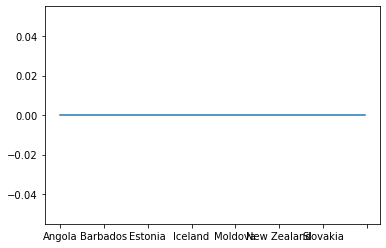

In [24]:
utest_int_fe.loc['statistic'].plot()

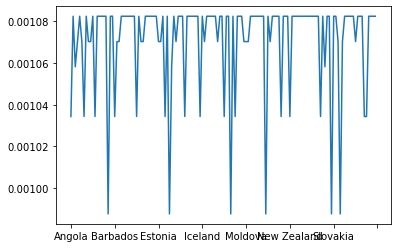

In [25]:
utest_int_fe.loc['pvalue'].plot()

По всем странам pvalue << меньше порогового значения __0.05__, чититаем, что данные коррелируют и есть взаимосвязь, следовательно, можно приступать к анализу показателей.

### u-test the Mann-Whitney для показателей государственной поддержки и GNI

In [26]:
mean_fe = pd.DataFrame(data = None, columns = list(gni_wb), index = list(gni_wb.index))
i = 0
for ds in list(dataset.keys())[:7]:
    mean_fe.iloc[i] = dataset[ds].mean()
    i += 1
#mean_fe.drop(['Republic of the Congo'], axis = 1, inplace = True)
mean_fe

Aruba   Angola  Albania United Arab Emirates Argentina  Armenia  \
2013   NaN  97.3514  69.8919              32.7297   68.7568  58.2162   
2014     0  94.0286  66.3429              33.4571   72.8857  60.6286   
2015     0  91.0312  66.0625              28.4375     75.75   57.375   
2016    36        0  64.8214                29.25   75.1786  56.1429   
2017   NaN      NaN  66.1071              26.1071   75.3214  61.8214   
2018   NaN      NaN  63.7037               24.963   69.9259  60.7037   
2019   NaN      NaN      NaN                  NaN   70.1538      NaN   

     Antigua and Barbuda Australia  Austria Azerbaijan  ...  \
2013                 NaN   24.8108  24.7027    78.0541  ...   
2014                   0   23.4571  27.2857    73.2571  ...   
2015                   0   26.0312  23.7812      73.25  ...   
2016                  36   19.6786  22.9286    67.8929  ...   
2017                 NaN   20.0357  21.5714    64.4643  ...   
2018                 NaN   19.7778  22.4815    63.7778  ...   
2019                 NaN   19.8462  21.5385        NaN  ...   

     United States of America Uzbekistan Saint Vincent and the Grenadines  \
2013                  21.2973    62.3784                              NaN   
2014                  24.3429    68.9714                                0   
2015                  22.0625    61.9375                                0   
2016                  20.1071          0                               36   
2017                  20.1071        NaN                              NaN   
2018                  18.8148        NaN                              NaN   
2019                      NaN        NaN                              NaN   

      Vietnam Vanuatu Samoa Kosovo    Yemen   Zambia Zimbabwe  
2013  64.8108     NaN   NaN    NaN  88.6757  69.5676  78.1622  
2014  69.1143       0     0      0  85.8857  65.1143  81.8571  
2015  68.6875       0     0      0  82.6562  64.1875  84.6875  
2016  63.3929      36    36     36  68.1429  65.5714        0  
2017  66.2857     NaN   NaN    NaN  78.4286  68.4286  76.5357  
2018  63.4815     NaN   NaN    NaN  81.7037   75.963  79.3333  
2019      NaN     NaN   NaN    NaN      NaN      NaN      NaN  

[7 rows x 180 columns]

In [27]:
nulls = mean_fe.isnull().sum()
print('Количество стран в датсете с пропусками:', len(nulls), '\n')
print('Страны с пропущенными значениями более 3:')
print(nulls[nulls > 3])

Количество стран в датсете с пропусками: 180 

Страны с пропущенными значениями более 3:
Aruba                                           4
Antigua and Barbuda                             4
Commonwealth of The Bahamas                     4
Bhutan                                          4
Comoros                                         4
Cuba                                            4
Curaçao                                         4
Cayman Islands                                  4
Djibouti                                        4
Dominica                                        4
Equatorial Guinea                               4
Grenada                                         4
Haiti                                           4
Isle of Man                                     4
Iraq                                            4
Kiribati                                        4
Saint Kitts and Nevis                           4
Liberia                                         4
Saint Lucia

In [28]:
#заплняю пропуски
for i in nulls[nulls > 0].keys():
    if i in nulls[nulls > 3]:
        mean_fe.drop(i, axis = 1, inplace = True)
    else: 
        mean_fe[i] = mean_fe[i].fillna(mean_fe[i].mean())
mean_fe

Angola    Albania  United Arab Emirates Argentina    Armenia  \
2013  97.351351  69.891892             32.729730   68.7568  58.216216   
2014  94.028571  66.342857             33.457143   72.8857  60.628571   
2015  91.031250  66.062500             28.437500     75.75  57.375000   
2016   0.000000  64.821429             29.250000   75.1786  56.142857   
2017  70.602793  66.107143             26.107143   75.3214  61.821429   
2018  70.602793  63.703704             24.962963   69.9259  60.703704   
2019  70.602793  66.154921             29.157413   70.1538  59.147963   

     Australia  Austria  Azerbaijan    Burundi  Belgium  ...   Tanzania  \
2013   24.8108  24.7027   78.054054   0.000000       24  ...  71.243243   
2014   23.4571  27.2857   73.257143  86.828571  28.8571  ...  73.800000   
2015   26.0312  23.7812   73.250000  82.031250  33.1562  ...  75.687500   
2016   19.6786  22.9286   67.892857  79.250000  29.0714  ...  82.142857   
2017   20.0357  21.5714   64.464286  78.714286  28.7857  ...  76.357143   
2018   19.7778  22.4815   63.777778  65.364821   26.037  ...  74.481481   
2019   19.8462  21.5385   70.116020  65.364821  25.3077  ...  75.618704   

         Uganda  Ukraine    Uruguay  United States of America  Uzbekistan  \
2013  76.108108  66.8919  61.189189                 21.297297   62.378378   
2014  71.800000  67.9429  61.428571                 24.342857   68.971429   
2015  70.437500  67.3125  60.750000                 22.062500   61.937500   
2016  66.357143  63.6071  56.428571                 20.107143    0.000000   
2017  68.857143  62.9286  59.750000                 20.107143   48.321827   
2018  68.074074  65.6296  59.407407                 18.814815   48.321827   
2019  70.272328       65  59.825623                 21.121959   48.321827   

        Vietnam      Yemen     Zambia   Zimbabwe  
2013  64.810811  88.675676  69.567568  78.162162  
2014  69.114286  85.885714  65.114286  81.857143  
2015  68.687500  82.656250  64.187500  84.687500  
2016  63.392857  68.142857  65.571429   0.000000  
2017  66.285714  78.428571  68.428571  76.535714  
2018  63.481481  81.703704  75.962963  79.333333  
2019  65.962108  80.915462  68.138719  66.762642  

[7 rows x 140 columns]

In [29]:
utest_fe = pd.DataFrame(data = None, columns = mean_int_fe.columns, index = ['statistic','pvalue'])
errlog_fe = list() #пременная для отлова пустых столбщов из-за не несовпадения названий
for col in utest_fe.columns:
    try:
        utest_fe.loc['statistic', col] = mannwhitneyu(mean_fe[col], gni_wb[col]).statistic
        utest_fe.loc['pvalue', col] = mannwhitneyu(mean_fe[col], gni_wb[col]).pvalue
    except: errlog_int_fe.append(col)
utest_fe 

Angola     Albania United Arab Emirates   Argentina  \
statistic           0           0                    0           0   
pvalue     0.00103439  0.00108251           0.00108251  0.00108251   

              Armenia   Australia     Austria  Azerbaijan     Burundi  \
statistic           0           0           0           0           0   
pvalue     0.00108251  0.00108251  0.00108251  0.00108251  0.00107035   

              Belgium  ...    Tanzania      Uganda     Ukraine     Uruguay  \
statistic           0  ...           0           0           0           0   
pvalue     0.00108251  ...  0.00108251  0.00108251  0.00108251  0.00108251   

          United States of America  Uzbekistan     Vietnam       Yemen  \
statistic                        0           0           0           0   
pvalue                  0.00107035  0.00103439  0.00108251  0.00108251   

               Zambia    Zimbabwe  
statistic           0           0  
pvalue     0.00108251  0.00108251  

[2 rows x 140 columns]

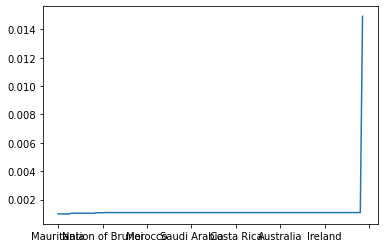

In [30]:
#без выбросов: 1 и 2 МАХ значения
utest_fe.T.sort_values('pvalue',ascending=True)['pvalue'][:-2].plot()

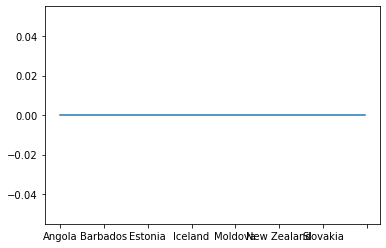

In [31]:
utest_int_fe.loc['statistic'].plot()

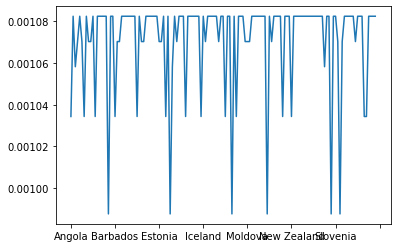

In [32]:
utest_int_fe.loc['pvalue'].drop('Sudan').plot()

#### Заключение 
Как видно из последнего графика, для, покрайней мере 140 стран, показатели Global Innovation Index (GII) и Gross Natural Income (GNI) имеют сильную корреляцию.
При очищении показателя GII до показателей иллюстирирующих государственную поддержку, зависимость от GNI не тольоко остаётся, но даже её характер не изменяется. 
Из исследования следует, что меры государственной поддержки инновационной системы напрямую влияют на её ВВП и справедливы для всех стран.

## Кластеризация стран

ООН выделяет три группы стран по уровню социально-экономического развития:

• развитые страны (developed countries)  
• страны с переходной экономикой (transition countries)  
• развивающиеся страны (developing countries)

Гипотезы:  
1) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GNI;  
2) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GII;  
3) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GNi + GII;  
4) Каждую страну в каждом году можно отнести к какой либо группе (классу) по 5 интегральным показателям;  
5) Каждую страну в каждом году можно отнести к какой либо группе (классу) по 37 показателям;  
6) Существуют показатели (из набора 37) для каждой страны которые им необходимо подтянуть для перехода в следующий класс.

#### Подготовка датасета GNI и GII для кластеризации

In [33]:
gni_kl = gni_wb.astype('float')
gii_kl = gii.iloc[:7].astype('float')
gii_kl

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013     93.0    138.0   135.0       56.0     59.0       19.0     23.0   
2014     94.0    133.0   135.0       70.0     65.0       17.0     20.0   
2015     87.0    126.0   120.0       72.0     61.0       17.0     18.0   
2016     92.0    113.0   130.0       81.0     60.0       19.0     20.0   
2017     93.0    108.0   130.0       76.0     59.0       23.0     20.0   
2018     83.0    110.0   130.0       80.0     68.0       20.0     21.0   
2019     83.0    113.0   130.0       73.0     64.0       22.0     21.0   

      Azerbaijan  Bahrain  Bangladesh  ...  United Arab Emirates  \
2013       105.0     67.0       130.0  ...             38.000000   
2014       101.0     62.0       129.0  ...             36.000000   
2015        93.0     59.0       129.0  ...             47.000000   
2016        85.0     57.0       117.0  ...             41.000000   
2017        82.0     66.0       114.0  ...             35.000000   
2018        82.0     72.0       116.0  ...             38.000000   
2019        84.0     78.0       116.0  ...             39.166667   

      United Kingdom  United States of America  Uruguay  Uzbekistan  \
2013             3.0                       5.0     52.0  133.000000   
2014             2.0                       6.0     72.0  128.000000   
2015             2.0                       5.0     68.0  122.000000   
2016             3.0                       4.0     62.0  127.666667   
2017             5.0                       4.0     67.0  127.666667   
2018             4.0                       6.0     62.0  127.666667   
2019             5.0                      36.0     62.0  127.666667   

      Venezuela  Vietnam  Yemen  Zambia    Zimbabwe  
2013      114.0     76.0  142.0   118.0  132.000000  
2014      122.0     71.0  141.0   121.0  130.000000  
2015      132.0     52.0  137.0   124.0  133.000000  
2016      120.0     59.0  128.0   125.0  131.666667  
2017      122.0     47.0  127.0   124.0  121.000000  
2018      122.0     45.0  126.0   120.0  113.000000  
2019      122.0     42.0  129.0   124.0  122.000000  

[7 rows x 141 columns]

##### Scaling GNI и GII

In [34]:
scaler_gni = StandardScaler()
scaler_gii = StandardScaler()

gni_sc = scaler_gni.fit_transform(gni_kl)
gii_sc = scaler_gii.fit_transform(gii_kl)

In [35]:
# 3 кластера
kmeans_gni = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)
kmeans_gii = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)

In [36]:
for i in range(gni_sc.shape[0]):
    gni_kmeans = kmeans_gni.fit(gni_sc[0].reshape(-1, 1))
    print('Year:', gni_kl.index[i])
    print('GNI labels count:')
    x = gni_kmeans.labels_
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    print(np.vstack((ii,y[ii])).T, '\n')

Year: 2013
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 

Year: 2014
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 

Year: 2015
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 

Year: 2016
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 

Year: 2017
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 

Year: 2018
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 

Year: 2019
GNI labels count:
[[ 0 55]
 [ 1 73]
 [ 2 52]] 



Классы распределены равномерно.
Необходимо проверить, как влияет на количество кластеров scale и нормирование. Для модели предпочтительно иметь как можно большее количество класов, поскольку это повысит количество границ перехода страны из класса в класс и может показать более точно показатели, которые влияют на этот переход.

#### Поиск оптимального количества классов для scaled GNI

No handles with labels found to put in legend.


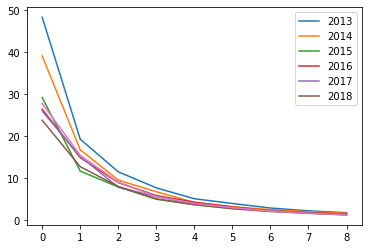

In [37]:
fig, ax = plt.subplots()

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(gni_sc.shape[0]):
    ssd = []
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300, n_jobs = -1)
        kmeans.fit(gni_sc[i].reshape(-1, 1))
        ssd.append(kmeans.inertia_)
    ax.legend()
    plt.plot(ssd, label = gni_kl.index[i])

In [38]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for i in range(gni_sc.shape[0]):
    print('GNI. Year:', gni_kl.index[i])
    for num_clusters in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300)
        kmeans.fit(gni_sc[i].reshape(-1, 1))
    
        cluster_labels = kmeans.labels_
    
        # silhouette score
        silhouette_avg = silhouette_score(gni_sc[i].reshape(-1, 1), cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    print('\n')

GNI. Year: 2013
For n_clusters=2, the silhouette score is 0.6479128410580406
For n_clusters=3, the silhouette score is 0.6358490526722875
For n_clusters=4, the silhouette score is 0.6134355460276819
For n_clusters=5, the silhouette score is 0.5639268398018982
For n_clusters=6, the silhouette score is 0.5681550008823859
For n_clusters=7, the silhouette score is 0.5626042265270255


GNI. Year: 2014
For n_clusters=2, the silhouette score is 0.6323886745069051
For n_clusters=3, the silhouette score is 0.6198878647064296
For n_clusters=4, the silhouette score is 0.618960532308714
For n_clusters=5, the silhouette score is 0.613161619920778
For n_clusters=6, the silhouette score is 0.627664018097231
For n_clusters=7, the silhouette score is 0.6133555599310568


GNI. Year: 2015
For n_clusters=2, the silhouette score is 0.5889573107010535
For n_clusters=3, the silhouette score is 0.6182747730292726
For n_clusters=4, the silhouette score is 0.6066603557740174
For n_clusters=5, the silhouette sco

Максимальное значение silhouette score зависит от года и колеблется от 2 до 7. Однозначно сложно определить количество классов. Целесообразно провести проверку, альтернативным методом, например MeanShift().

In [39]:
#Проверяю исходный GNI с помощью MeanShift() на количество классов
count = int()
for i in range(gni_sc.shape[0]):
    print('GNI. Year:', gni_kl.index[i])
    ms = MeanShift()
    ms.fit(gni_sc[i].reshape(-1, 1))
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднеарифметическое количество кластеров:', round(count/i))

GNI. Year: 2013
Estimated clusters: 3 

GNI. Year: 2014
Estimated clusters: 3 

GNI. Year: 2015
Estimated clusters: 3 

GNI. Year: 2016
Estimated clusters: 4 

GNI. Year: 2017
Estimated clusters: 2 

GNI. Year: 2018
Estimated clusters: 2 

GNI. Year: 2019
Estimated clusters: 4 

Среднеарифметическое количество кластеров: 4


Организация объединённых наций разделяет страны по GNI на 3 класса, однако, как видно, класс страны сильно колеблется от года, по этому целесообразно разделять страны на 4 класса.

#### Поиск оптимального количества классов для scaled GII

In [40]:
for i in range(gii_sc.shape[0]):
    gii_kmeans = kmeans_gii.fit(gii_sc[i].reshape(-1, 1))
    print('Year:', gii_kl.index[i])
    print('GII labels count:')
    x = gii_kmeans.labels_
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    print(np.vstack((ii,y[ii])).T, '\n')

Year: 2013
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2014
GII labels count:
[[ 0 59]
 [ 1 26]
 [ 2 56]] 

Year: 2015
GII labels count:
[[ 0 56]
 [ 1 39]
 [ 2 46]] 

Year: 2016
GII labels count:
[[ 0 61]
 [ 1 45]
 [ 2 35]] 

Year: 2017
GII labels count:
[[ 0 66]
 [ 1 55]
 [ 2 20]] 

Year: 2018
GII labels count:
[[ 0 63]
 [ 1 48]
 [ 2 30]] 

Year: 2019
GII labels count:
[[ 0 50]
 [ 1 35]
 [ 2 56]] 



No handles with labels found to put in legend.


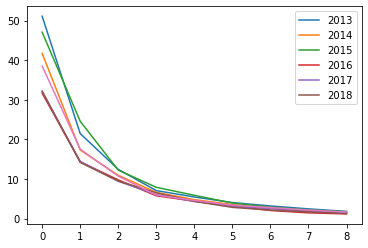

In [41]:
# Поиск оптимального количества классов для GII
fig, ax = plt.subplots()

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(gii_sc.shape[0]):
    ssd = []
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300, n_jobs = -1)
        kmeans.fit(gii_sc[i].reshape(-1, 1))
        ssd.append(kmeans.inertia_)
    ax.legend()
    plt.plot(ssd, label = gii_kl.index[i])

In [42]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 9, 10]

for i in range(gii_sc.shape[0]):
    print('GII. Year:', gii_kl.index[i])
    for num_clusters in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300)
        kmeans.fit(gii_sc[i].reshape(-1, 1))
    
        cluster_labels = kmeans.labels_
    
        # silhouette score
        silhouette_avg = silhouette_score(gii_sc[i].reshape(-1, 1), cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    print('\n')

GII. Year: 2013
For n_clusters=2, the silhouette score is 0.671414655291795
For n_clusters=3, the silhouette score is 0.638682244234715
For n_clusters=4, the silhouette score is 0.6066377345619604
For n_clusters=5, the silhouette score is 0.6080052543431153
For n_clusters=6, the silhouette score is 0.5861622925489324
For n_clusters=7, the silhouette score is 0.5618375672271052
For n_clusters=9, the silhouette score is 0.582478200057242
For n_clusters=10, the silhouette score is 0.5824884600821411


GII. Year: 2014
For n_clusters=2, the silhouette score is 0.6007150949244249
For n_clusters=3, the silhouette score is 0.625034381227043
For n_clusters=4, the silhouette score is 0.5759156212906873
For n_clusters=5, the silhouette score is 0.579713359083869
For n_clusters=6, the silhouette score is 0.5840163792143278
For n_clusters=7, the silhouette score is 0.5770773918664954
For n_clusters=9, the silhouette score is 0.5934137289087613
For n_clusters=10, the silhouette score is 0.6169039223

Максимальное значение silhouette score зависит от года и колеблется от 2 до 9. Однозначно сложно определить количество классов. Для нахождения количества классов воспользуюсь тем же методом -  MeanShift().

In [43]:
#Проверяю scaled GII с помощью MeanShift() на количество классов
count = int()
for i in range(gii_sc.shape[0]):
    print('GII. Year:', gii_kl.index[i])
    ms = MeanShift()
    ms.fit(gii_sc[i].reshape(-1, 1))
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднеарифметическое количество кластеров:', round(count/i))

GII. Year: 2013
Estimated clusters: 3 

GII. Year: 2014
Estimated clusters: 3 

GII. Year: 2015
Estimated clusters: 3 

GII. Year: 2016
Estimated clusters: 3 

GII. Year: 2017
Estimated clusters: 2 

GII. Year: 2018
Estimated clusters: 4 

GII. Year: 2019
Estimated clusters: 2 

Среднеарифметическое количество кластеров: 3


In [44]:
#Проверяю scaled GII с помощью MeanShift() на количество классов
gii_nrm = normalize(gii_sc)

count = int()
for i in range(gii_sc.shape[0]):
    print('GII. Year:', gii_kl.index[i])
    ms = MeanShift()
    ms.fit(gii_nrm[i].reshape(-1, 1))
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднеарифметическое количество кластеров:', round(count/i))

GII. Year: 2013
Estimated clusters: 3 

GII. Year: 2014
Estimated clusters: 3 

GII. Year: 2015
Estimated clusters: 3 

GII. Year: 2016
Estimated clusters: 3 

GII. Year: 2017
Estimated clusters: 2 

GII. Year: 2018
Estimated clusters: 4 

GII. Year: 2019
Estimated clusters: 2 

Среднеарифметическое количество кластеров: 3


### Выводы

Проверка MeanShift() показалала, что количество кластеров для GII, как и GNI так же меняется год от года. Cреднеарифметическое количество клатеров равно для GNI = 3, а для GII - 3. В дальнейших расчётах буду использовать количество кластеров равное **3**, для всех наборов показателей.

In [45]:
#Рассчёт кластеров GII
# формирование словаря KMeans n_clusters = 3
kmeans3_gii = {}
kmeans3_gii_nrm = {}
n_clusters = 3

kmeans3_gii = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)
    
#нормализованный данные
kmeans3_gii_nrm = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)

# рассчёт KMeans для GII, 
gii_kmeans_labels = {}
gii_kmeans_fe = {}

#нормализованные данные
gii_kmeans_labels_nrm = {}
gii_kmeans_fe_nrm = {}

for i in range(len(gii_kl.index)):
    eyear_ind = gii_kl.index[i]
    # scale датасет
    kmeans3_gii = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)
    gii_kmeans_labels[eyear_ind] = kmeans3_gii.fit(gii_sc[i].T.reshape(-1, 1))
    gii_kmeans_fe[eyear_ind] =  kmeans3_gii.fit_transform(gii_sc[i].reshape(-1, 1))
    
    #нормализованные данные
    kmeans3_gii_nrm = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)
    gii_kmeans_labels_nrm[eyear_ind] = kmeans3_gii_nrm.fit(gii_nrm[i].reshape(-1, 1))
    gii_kmeans_fe_nrm[eyear_ind] =  kmeans3_gii_nrm.fit_transform(gii_nrm[i].reshape(-1, 1)) 

In [46]:
#scaled gii
gii_labels = pd.DataFrame()
for year in gii_kmeans_labels.keys():
    temp_s = pd.Series(data = gii_kmeans_labels[year].labels_, index = gii.loc[year].index, name = year)
    gii_labels = gii_labels.append(temp_s).astype('int')
gii_labels += 1 #добавляю 1, что бы кластеры нумеровались с 1, а не с 0

#нормализованный gii
gii_labels_nrm = pd.DataFrame()
for year in gii_kmeans_labels_nrm.keys():
    temp_s = pd.Series(data = gii_kmeans_labels_nrm[year].labels_, index = gii.loc[year].index, name = year)
    gii_labels_nrm = gii_labels_nrm.append(temp_s).astype('int')
gii_labels_nrm += 1 #добавляю 1, что бы кластеры нумеровались с 1, а не с 0

Графики кластеров нескольких стран

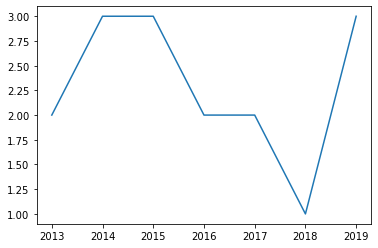

In [47]:
gii_labels["Russian Federation"].plot()

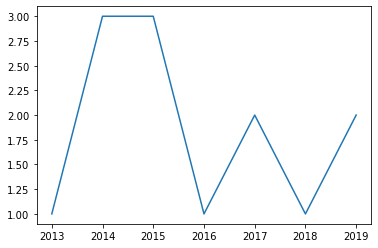

In [48]:
gii_labels["United States of America"].plot()

## Двухфакторная кластеризация

Однофакторная классификация может не полносью отражасть положение страны, то есть её кластер, поскольку индекс GII слишком узкий показаетль, основанный на части субъективных показателях.  
Для уточнения кластера провожу двухфакторную кластеризацию по GII и GNI.

In [49]:
# подготовка списка столбцов
col_list_gii_gni = list(set(gii.columns.append(gni_wb.columns)))
col_list_gii_gni.sort()

#Создание словаря с датафремами GII и GNI по годам
gii_gni_dict = {}
gii_gni = pd.DataFrame(data = None, columns = col_list_gii_gni, index = ['GII', 'GNI'])

#Создаю словарь с датасетами {год: страны [GII, GNI]} 
for ind in gii_kl.index:
    gii_gni_temp = pd.DataFrame(data = None, columns = col_list_gii_gni, index = ['GII', 'GNI'])
    gii_gni_temp.loc['GII'] = gii_kl.loc[ind]
    gii_gni_temp.loc['GNI'] = gni_kl.loc[str(ind)]
    gii_gni_temp.dropna(axis = 1, how = 'any', inplace = True)
    gii_gni_dict[ind] = gii_gni_temp

In [50]:
#Поскольку размерности GNI и GII отличаются на сотни порядков логарифмирую GNI для 'сближения' данных
for ds in gii_gni_dict.keys():
    for i in range(len(gii_gni_dict[ds].columns)):
        gii_gni_dict[ds].iloc[1,i] = np.log10(gii_gni_dict[ds].iloc[1,i])

In [51]:
#определяю количество кластеров с помощью MeanShift()
for ds in gii_gni_dict.keys():
    ms = MeanShift()
    ms.fit(gii_gni_dict[ds].T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print(ds)
    print(ms.labels_)
    print("Estimated clusters:", n_clusters_, '\n')

2013
[2 2 2 1 1 1 1 2 0 2 1 0 1 2 2 2 0 0 0 1 2 2 2 1 2 1 1 1 1 1 1 1 1 0 0 0 1
 2 2 1 1 2 0 1 2 1 0 0 2 1 1 0 0 2 1 1 1 2 0 1 1 0 2 1 2 1 0 2 1 1 2 2 1 2
 1 1 1 1 0 1 0 2 2 0 2 1 1 2 2 2 1 0 2 0 2 0 0 1 1 1 2 1 1 1 1 2 1 2 1 1 1
 1 1 2 2 1 1 2 2 1 2 0 0 0 0 0 1 1 1 1 2 0 2 2 2]
Estimated clusters: 3 

2014
[0 0 0 2 2 1 1 0 2 0 1 2 1 0 0 0 0 0 2 2 0 0 0 1 0 2 1 2 2 1 1 1 1 0 0 0 1
 0 0 1 1 0 2 1 0 2 0 0 0 1 1 0 0 0 1 1 1 0 0 1 2 0 0 2 0 1 0 0 1 1 0 0 1 0
 1 1 2 1 2 2 0 0 0 0 0 1 1 0 0 0 1 0 0 2 0 2 0 2 1 2 0 1 2 2 2 0 1 0 2 1 1
 1 1 0 0 1 1 0 0 2 0 0 0 2 0 2 1 1 1 2 0 2 0 0 0]
Estimated clusters: 3 

2015
[0 0 0 2 2 1 1 0 2 0 1 2 1 0 0 0 0 0 2 1 0 0 0 1 0 1 1 2 2 1 1 1 1 0 0 0 1
 0 0 1 1 0 2 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 2 0 0 2 0 1 2 0 1 1 0 0 1 0
 1 2 2 1 2 1 2 0 0 0 0 1 1 0 0 0 1 2 0 2 0 2 0 1 1 2 0 1 2 2 2 0 1 0 2 1 1
 1 1 0 0 1 1 0 0 2 0 0 2 2 0 2 1 1 1 2 0 2 0 0 0]
Estimated clusters: 3 

2016
[0 0 0 0 1 2 2 0 1 0 2 0 2 0 0 0 0 0 1 2 0 0 0 2 0 2 2 1 2 1 2 2 2 0 0 0 2
 0 0 2 2

In [52]:
#подбор оптимального количества класторов
#Гипотеза: количество кластеров не может быть постоянным, постколько количество кластеров GII и GNI
#меняется год от года, не зависио друг от друга.

# Проверка инструментом DBSCAN
count = int() #счётчик максимальных значений кластеров
sum_y = int() #количество учётнных кластеров >0

for year in gii_gni_dict.keys():
    print(year)
    for i in range(len(gii_gni_dict.keys())+3):
        clustering = DBSCAN(eps=2, min_samples = i, n_jobs = -1).fit(gii_gni_dict[year].T)
        print('Количество кластеров:', clustering.labels_.max())
        if clustering.labels_.max() >=1:
            count += clustering.labels_.max()
            sum_y+=1
    print('\n')
print('Среднее количество кластеров:', count/sum_y)

2013
Количество кластеров: 18
Количество кластеров: 18
Количество кластеров: 13
Количество кластеров: 12
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1


2014
Количество кластеров: 19
Количество кластеров: 19
Количество кластеров: 13
Количество кластеров: 13
Количество кластеров: 2
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1


2015
Количество кластеров: 22
Количество кластеров: 22
Количество кластеров: 16
Количество кластеров: 13
Количество кластеров: 3
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1
Количество кластеров: -1


2016
Количество кластеров: 16
Количество кластеров: 16
Количество кластеров: 13
Количество кластеров: 11
Количество кластеров: 3
Количество кластеров: 1
Количество кластеров: 1
Количество кластеров: 0
Количество кластеров: -1
Колич

Принимаю количество кластеров равное 10.

In [53]:
kmeans3_gii_gni10 = {}
gii_gni_kmeans_fe10 = {}
gii_gni_kmeans_labels10 = {}

for ds in gii_gni_dict.keys():
    kmeans3_gii_gni10[ds] = KMeans(n_clusters = 10, random_state = 42, n_jobs = -1)
    
    gii_gni_kmeans_labels10[ds] = kmeans3_gii_gni10[ds].fit(gii_gni_dict[ds].T)
    gii_gni_kmeans_fe10[ds] =  kmeans3_gii_gni10[ds].fit_transform(gii_gni_dict[ds].T)

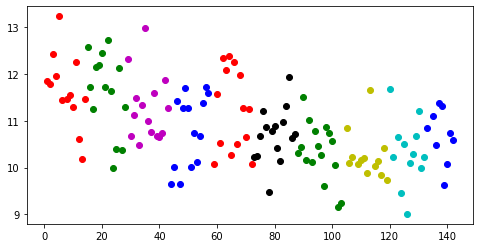

In [54]:
#визуализация 3 классоов для gii_gni_dict[2013]
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

ds = 2013

labels = gii_gni_kmeans_labels10[ds].labels_
a = 0
b = 1
for i in range(len(gii_gni_kmeans_fe10[ds])):
    ax.scatter(gii_gni_dict[ds].iloc[a,i], 
               gii_gni_dict[ds].iloc[b,i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

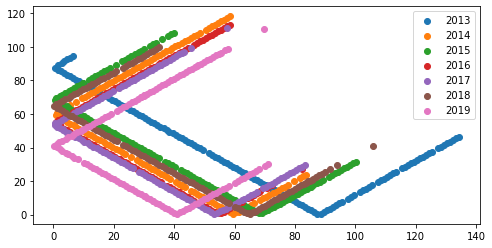

In [55]:
a = 0 # range (0,1)
b = 1 # range (0,1)

fig, ax = plt.subplots()

for i in gii_gni_kmeans_fe10.keys():
    ax.scatter(gii_gni_kmeans_fe10[i].T[a], gii_gni_kmeans_fe10[i].T[b], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

In [56]:
# датасет кластеры gii_gni_kmeans_labels10 по странам и годам
gii_gni_labels10 = pd.DataFrame()

for year in gii_gni_kmeans_labels10.keys():
    temp_s = pd.Series(data = gii_gni_kmeans_labels10[year].labels_,
                       index = gii_gni_dict[year].columns,
                       name = year)
    gii_gni_labels10 = gii_gni_labels10.append(temp_s).astype('int')
gii_gni_labels10 += 1 #добавляю 1, что бы кластеры нумеровались с 1, а не с 0
gii_gni_labels10

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013        2       10      10          3        8          9        9   
2014        4        7       7          6        1          3        3   
2015        7        4       8          3       10          9        9   
2016        8        2       7          8        1          3        3   
2017        6        3       9          8        4         10       10   
2018        9        4      10          7        3          8        8   
2019       10        7       3          1        8          9        9   

      Azerbaijan  Bahrain  Bangladesh  ...  Ukraine  United Arab Emirates  \
2013           6        8           4  ...        8                     7   
2014           8        1           7  ...        1                     9   
2015           7       10           4  ...       10                     6   
2016           8        1           2  ...        1                     9   
2017           1        8           3  ...        4                     2   
2018           9        7           4  ...        5                     1   
2019          10        1           7  ...        6                     6   

      United Kingdom  United States of America  Uruguay  Uzbekistan  Vietnam  \
2013               1                         1        3          10        5   
2014              10                        10        6           7        6   
2015               5                         5        3           8        6   
2016              10                        10        1           7        1   
2017               5                         5        8           9        7   
2018               6                         6        3          10        5   
2019               5                         2        8           3        6   

      Yemen  Zambia  Zimbabwe  
2013     10       6         4  
2014      7       2         7  
2015      4       4         4  
2016      7       7         7  
2017      9       9         9  
2018     10      10         4  
2019      3       3         3  

[7 rows x 135 columns]

Text(0, 0.5, 'Claster')

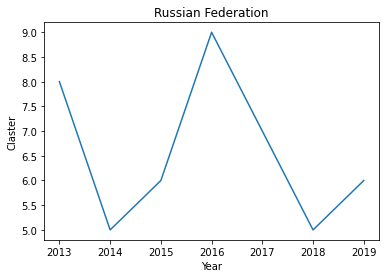

In [57]:
country = "Russian Federation"
gii_gni_labels10[country].plot()
plt.title(country)
plt.xlabel('Year')
plt.ylabel('Claster')

Text(0, 0.5, 'Claster')

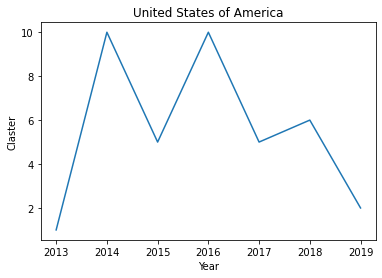

In [58]:
country = "United States of America"
gii_gni_labels10[country].plot()
plt.title(country)
plt.xlabel('Year')
plt.ylabel('Claster')

## Интегральные показатели   
* Political environment  
* Regulatory environment  
* Credit	  
* Innovation linkages

In [59]:
# привожу к одной шкале датасет 'integr_fe'
intfe_dict_sc = {}
scaler_inffe = StandardScaler()

#scaled датасет 'integr_fe'
for ds in dataset['integr_fe'].keys():
    intfe_dict_sc[ds] = scaler_inffe.fit_transform(dataset['integr_fe'][ds].drop('region', axis = 0).astype('float').T)
    
# нормализация датасет 'integr_fe'
intfe_dict_nrm = {}
for ds in intfe_dict_sc.keys():    
    intfe_dict_nrm[ds] = normalize(intfe_dict_sc[ds])
    #intfe_dict_nrm[ds] =  normalize(dataset['integr_fe'][ds].drop('region', axis = 0).astype('float').T)

In [60]:
# применяю MeanShift к scaled датасет 'integr_fe'
count = int()
n_clusters_ = int()
for ds in dataset['integr_fe'].keys():
    ms = MeanShift()
    ms.fit(intfe_dict_sc[ds].T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print(ds)
    print(cluster_centers.shape)    
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднее количества кластров:', count/len(dataset['integr_fe'].keys()))
print('Среднее количество кластров:', round(count/len(dataset['integr_fe'].keys())))

int_fe_2013
(4, 148)
Estimated clusters: 4 

int_fe_2014
(3, 224)
Estimated clusters: 3 

int_fe_2015
(5, 224)
Estimated clusters: 5 

int_fe_2016
(4, 224)
Estimated clusters: 4 

int_fe_2017
(1, 126)
Estimated clusters: 1 

int_fe_2018
(2, 125)
Estimated clusters: 2 

int_fe_2019
(3, 127)
Estimated clusters: 3 

Среднее количества кластров: 3.142857142857143
Среднее количество кластров: 3


In [61]:
#применяю плавающее количество кластеров, подобно GII
kmeans_fe_fl = {
    'int_fe_2013' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2014' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2015' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    'int_fe_2016' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2017' : KMeans(n_clusters = 2, random_state = 42, n_jobs = -1),
    'int_fe_2018' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    'int_fe_2019' : KMeans(n_clusters = 2, random_state = 42, n_jobs = -1) }

intfe_dict_kmeans_fl_labels = {}
intfe_dict_kmeans_fl_fe = {}
count = int()

for ds in intfe_dict_nrm.keys():
    intfe_dict_kmeans_fl_labels[ds] = kmeans_fe_fl[ds].fit(intfe_dict_nrm[ds])
    intfe_dict_kmeans_fl_fe[ds] = kmeans_fe_fl[ds].fit_transform(intfe_dict_nrm[ds])
    count += len(np.unique(intfe_dict_kmeans_fl_labels[ds].labels_)) 
    
    #печать 
    print(ds)
    print('Количество кластеров:', len(np.unique(intfe_dict_kmeans_fl_labels[ds].labels_)))
    print(intfe_dict_kmeans_fl_fe[ds].shape, '\n')
print('Среднее количества кластров:', count/len(intfe_dict_nrm.keys()))
print('Среднее количество кластров:', round(count/len(intfe_dict_nrm.keys())))

int_fe_2013
Количество кластеров: 3
(148, 3) 

int_fe_2014
Количество кластеров: 3
(224, 3) 

int_fe_2015
Количество кластеров: 4
(224, 4) 

int_fe_2016
Количество кластеров: 3
(224, 3) 

int_fe_2017
Количество кластеров: 2
(126, 2) 

int_fe_2018
Количество кластеров: 4
(125, 4) 

int_fe_2019
Количество кластеров: 2
(127, 2) 

Среднее количества кластров: 3.0
Среднее количество кластров: 3


Количество кластеров во всех рассчетах 3.  
Приведени к единому количеству кластеров, видимо не совсем корректно, однако, датасет содержит аппроксимации данных и нулевые значачения, кроме того, предполага, что приемственность кластеров сохраняется при переходе на низший уровень структуры GII.

In [62]:
# 3 класса и нормализованные данные
# рассчёт классов и координат KMeans()
kmeans_fe = {}
n_cls = 3

for key in intfe_dict_nrm.keys():
    kmeans_fe[key] = KMeans(n_clusters = n_cls, random_state = 42, n_jobs = -1)
    
intfe_dict_kmeans_nrm_labels = {}
intfe_dict_kmeans_nrm_fe = {}

for ds_sc in intfe_dict_sc.keys():
    intfe_dict_kmeans_nrm_labels[ds_sc] = kmeans_fe[ds_sc].fit(intfe_dict_nrm[ds_sc])
    intfe_dict_kmeans_nrm_fe[ds_sc] = kmeans_fe[ds_sc].fit_transform(intfe_dict_nrm[ds_sc])

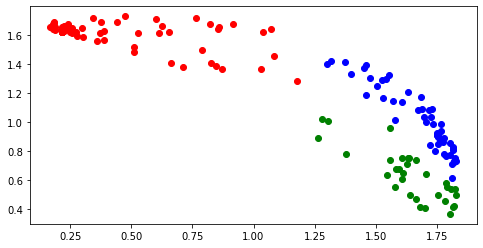

In [63]:
#визуализация 3 классоов для int_fe_2013
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

labels = intfe_dict_kmeans_nrm_labels['int_fe_2013'].labels_

a = 0
b = 1
for i in range(len(intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[a])):
    ax.scatter(intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[a][i], 
               intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[b][i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

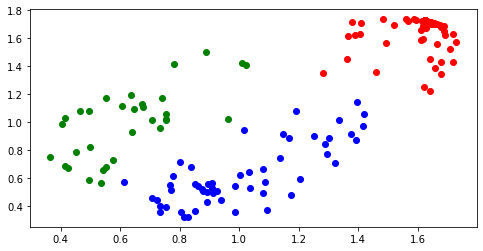

In [64]:
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

labels = intfe_dict_kmeans_nrm_labels['int_fe_2013'].labels_

a = 1
b = 2
for i in range(len(intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[a])):
    ax.scatter(intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[a][i], 
               intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[b][i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

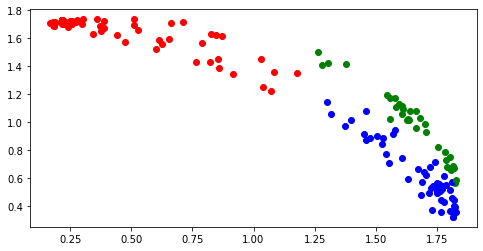

In [65]:
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

labels = intfe_dict_kmeans_nrm_labels['int_fe_2013'].labels_

a = 0
b = 2
for i in range(len(intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[a])):
    ax.scatter(intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[a][i], 
               intfe_dict_kmeans_nrm_fe['int_fe_2013'].T[b][i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

Визуализация нормализованного датасета интегральных показателей

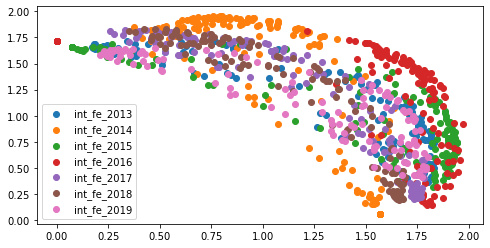

In [66]:
a = 0 # range (0,2)
b = 1 # range (0,2)

fig, ax = plt.subplots()

for i in intfe_dict_kmeans_nrm_fe.keys():
    ax.scatter(intfe_dict_kmeans_nrm_fe[i].T[a], intfe_dict_kmeans_nrm_fe[i].T[b], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

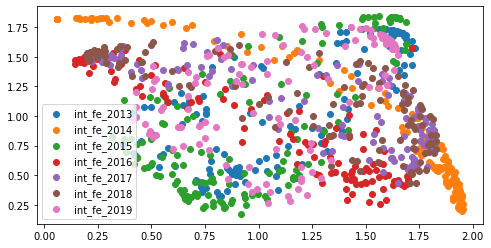

In [67]:
c = 1 # range (0,2)
d = 2 # range (0,2)

fig, ax = plt.subplots()
for i in intfe_dict_kmeans_nrm_fe.keys():
    ax.scatter(intfe_dict_kmeans_nrm_fe[i].T[c], intfe_dict_kmeans_nrm_fe[i].T[d], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)    
plt.show()

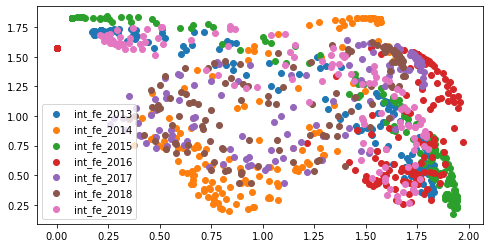

In [68]:
e = 0 # range (0,2)
f = 2 # range (0,2)

fig, ax = plt.subplots()
for i in intfe_dict_kmeans_nrm_fe.keys():
    ax.scatter(intfe_dict_kmeans_nrm_fe[i].T[e], intfe_dict_kmeans_nrm_fe[i].T[f], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)    
plt.show()

Очевидно, сто страны меняют своё положение в классах от года к году  

Сокращаю размерность для визуализации хотя бы в 3D

In [69]:
intfe_dict_kmeans3_labels = intfe_dict_kmeans_nrm_labels
intfe_dict_kmeans3_fe = intfe_dict_kmeans_nrm_fe

#### Графики в 3Д

In [70]:
x = intfe_dict_kmeans3_fe['int_fe_2013'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2013'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2013'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2013'].labels_)
fig.show()

In [71]:
x = intfe_dict_kmeans3_fe['int_fe_2014'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2014'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2014'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2014'].labels_)
fig.show()

In [72]:
x = intfe_dict_kmeans3_fe['int_fe_2015'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2015'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2015'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2015'].labels_)
fig.show()

In [73]:
x = intfe_dict_kmeans3_fe['int_fe_2016'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2016'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2016'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2016'].labels_)
fig.show()

In [74]:
x = intfe_dict_kmeans3_fe['int_fe_2017'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2017'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2017'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2017'].labels_)
fig.show()

In [75]:
x = intfe_dict_kmeans3_fe['int_fe_2018'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2018'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2018'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2018'].labels_)
fig.show()

In [76]:
x = intfe_dict_kmeans3_fe['int_fe_2019'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2019'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2019'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2019'].labels_)
fig.show()

---

### Набор из 37 показателей, характеризующих государственную поддержку инновационной системы страны

Поиск количество кластеров для pack_37

In [77]:
pack37 = {}
for ds in list(dataset.keys())[:7]:
    pack37[ds] = dataset[ds]

In [78]:
# привожу шкалы датасето 37 показателей к одной
pack37_sc = {}
scaler_pack37 = StandardScaler()

for ds in list(dataset.keys())[:7]:
    pack37_sc[ds] = scaler_pack37.fit_transform(dataset[ds].drop([dataset[ds].columns[0], 
                                                               dataset[ds].columns[1]], axis = 1).astype('float').T)
# нормализаци данных
pack37_nrm = {}
for ds in list(dataset.keys())[:7]:
    pack37_nrm[ds] =  normalize(pack37_sc[ds])
    #pack37_nrm[ds] = dataset[ds].drop([dataset[ds].columns[0], dataset[ds].columns[1]], axis = 1).astype('float').T

In [79]:
# 3 класса - беру по аналогии с GII и GNI
# формирование словаря KMeans
kmeans_pack37 = {}
kmeans_pack37_nrm = {}
n_clusters = 3

for key in pack37_sc.keys():
    kmeans_pack37[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)
    
    #нормализованныt данные
    kmeans_pack37_nrm[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)
     
# рассчёт KMeans для scaled pack37
pack37_kmeans_labels = {}
pack37_kmeans_fe = {}

#нормализованные данные
pack37_kmeans_labels_nrm = {}
pack37_kmeans_fe_nrm = {}

for ds in pack37_sc.keys():
    # scale датасет
    pack37_kmeans_labels[ds] = kmeans_pack37[ds].fit(pack37_sc[ds])
    pack37_kmeans_fe[ds] =  kmeans_pack37[ds].fit_transform(pack37_sc[ds])
    
    #нормализованные данные
    pack37_kmeans_labels_nrm[ds] = kmeans_pack37_nrm[ds].fit(pack37_nrm[ds])
    pack37_kmeans_fe_nrm[ds] =  kmeans_pack37_nrm[ds].fit_transform(pack37_nrm[ds])        

In [80]:
# применяю MeanShift к нормализованному датасету
count = int()
for ds in pack37_kmeans_fe_nrm.keys():
    ms = MeanShift()
    ms.fit(pack37_kmeans_fe_nrm[ds].T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print(ds)
    print(cluster_centers.shape)    
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднее количества кластров:', count/len(pack37_kmeans_fe_nrm.keys()))
print('Среднее количество кластров:', round(count/len(pack37_kmeans_fe_nrm.keys())))

2013
(1, 148)
Estimated clusters: 1 

2014
(1, 224)
Estimated clusters: 1 

2015
(3, 224)
Estimated clusters: 3 

2016
(1, 224)
Estimated clusters: 1 

2017
(3, 126)
Estimated clusters: 3 

2018
(3, 125)
Estimated clusters: 3 

2019
(2, 127)
Estimated clusters: 2 

Среднее количества кластров: 2.0
Среднее количество кластров: 2


In [81]:
#применяю плавающее количество кластеров
kmeans_37_fe_fl = {
    '2013' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2014' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2015' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2016' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2017' : KMeans(n_clusters = 2, random_state = 42, n_jobs = -1),
    '2018' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    '2019' : KMeans(n_clusters = 2, random_state = 42, n_jobs = -1) }

# плавающее количество классов
pack37_dict_kmeans_fl_labels = {}
pack37_dict_kmeans_fl_fe = {}
count = int()

for ds in pack37_sc.keys():
    pack37_dict_kmeans_fl_labels[ds] = kmeans_37_fe_fl[ds].fit(pack37_kmeans_fe_nrm[ds])
    pack37_dict_kmeans_fl_fe[ds] = kmeans_37_fe_fl[ds].fit_transform(pack37_kmeans_fe_nrm[ds])
    count += len(np.unique(pack37_dict_kmeans_fl_labels[ds].labels_)) 
    #результаты
    print(ds)
    print('Количество кластеров:', len(np.unique(pack37_dict_kmeans_fl_labels[ds].labels_)))
    print(pack37_dict_kmeans_fl_fe[ds].shape, '\n')
print('Среднее количества кластров:', count/len(pack37_dict_kmeans_fl_labels.keys()))
print('Среднее количество кластров:', round(count/len(pack37_dict_kmeans_fl_labels.keys())))

2013
Количество кластеров: 3
(148, 3) 

2014
Количество кластеров: 3
(224, 3) 

2015
Количество кластеров: 3
(224, 3) 

2016
Количество кластеров: 3
(224, 3) 

2017
Количество кластеров: 2
(126, 2) 

2018
Количество кластеров: 4
(125, 4) 

2019
Количество кластеров: 2
(127, 2) 

Среднее количества кластров: 2.857142857142857
Среднее количество кластров: 3


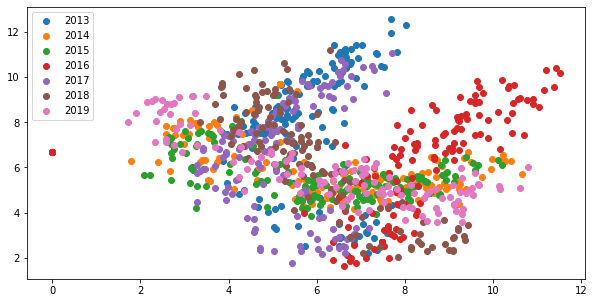

In [82]:
a = 0 # range (0,2)
b = 1 # range (0,2)

fig, ax = plt.subplots()

for i in pack37_kmeans_fe.keys():
    ax.scatter(pack37_kmeans_fe[i].T[a], pack37_kmeans_fe[i].T[b], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10) 
plt.show()

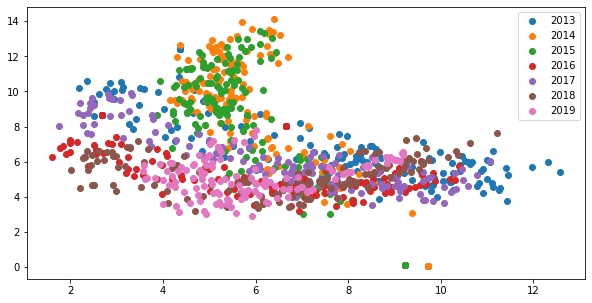

In [83]:
c = 1 # range (0,2)
d = 2 # range (0,2)

fig, ax = plt.subplots()
for i in pack37_kmeans_fe.keys():
    ax.scatter(pack37_kmeans_fe[i].T[c], pack37_kmeans_fe[i].T[d], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10) 
plt.show()

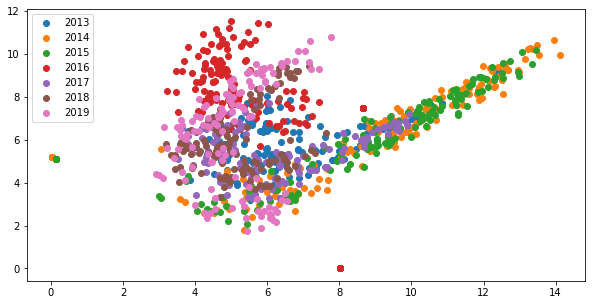

In [84]:
c = 2 # range (0,2)
d = 0 # range (0,2)

fig, ax = plt.subplots()
for i in pack37_kmeans_fe.keys():
    ax.scatter(pack37_kmeans_fe[i].T[c], pack37_kmeans_fe[i].T[d], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10) 
plt.show()

In [85]:
for i in pack37_kmeans_fe.keys():
    x = pack37_kmeans_fe[i].T[0]
    y = pack37_kmeans_fe[i].T[1]
    z = pack37_kmeans_fe[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans_labels[i].labels_, title = i)
    fig.show()

In [86]:
# формирование словаря KMeans
kmeans3_pack37 = {}
kmeans3_pack37_nrm = {}
n_clusters = 3

for key in pack37_nrm.keys():
    kmeans3_pack37[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)
    
    #нормализованный данные
    kmeans3_pack37_nrm[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)

In [87]:
# рассчёт KMeans для датасета
pack37_kmeans3_labels = {}
pack37_kmeans3_fe = {}

#нормализованные данные
pack37_kmeans3_labels_nrm = {}
pack37_kmeans3_fe_nrm = {}

for ds in pack37_nrm.keys():
    pack37_kmeans3_labels[ds] = kmeans3_pack37[ds].fit(pack37_sc[ds])
    pack37_kmeans3_fe[ds] =  kmeans3_pack37[ds].fit_transform(pack37_sc[ds])
    
    #нормализованные данные
    pack37_kmeans3_labels_nrm[ds] = kmeans3_pack37_nrm[ds].fit(pack37_nrm[ds])
    pack37_kmeans3_fe_nrm[ds] =  kmeans3_pack37_nrm[ds].fit_transform(pack37_nrm[ds])  

In [88]:
#визуализация распределения по классам scaled pack37
for i in pack37_kmeans3_fe.keys():
    x = pack37_kmeans3_fe[i].T[0]
    y = pack37_kmeans3_fe[i].T[1]
    z = pack37_kmeans3_fe[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans3_labels[i].labels_, title = i)
    fig.show()

In [89]:
#визуализация распределения по классам нормированных данных
for i in pack37_kmeans3_fe_nrm.keys():
    x = pack37_kmeans3_fe_nrm[i].T[0]
    y = pack37_kmeans3_fe_nrm[i].T[1]
    z = pack37_kmeans3_fe_nrm[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans3_labels_nrm[i].labels_, title = i)
    fig.show()

Нормализованный дататсет

In [90]:
#Нормализованный датасет с классами стран
pack37_labels_nrm = pd.DataFrame()
lebels_2013 = pd.Series(data = pack37_kmeans3_labels_nrm['2013'].labels_,index = pack37['2013'].columns[2:], name = '2013')
lebels_2014 = pd.Series(data = pack37_kmeans3_labels_nrm['2014'].labels_,index = pack37['2014'].columns[2:], name = '2014')
lebels_2015 = pd.Series(data = pack37_kmeans3_labels_nrm['2015'].labels_,index = pack37['2015'].columns[2:], name = '2015')
lebels_2016 = pd.Series(data = pack37_kmeans3_labels_nrm['2016'].labels_,index = pack37['2016'].columns[2:], name = '2016')
lebels_2017 = pd.Series(data = pack37_kmeans3_labels_nrm['2017'].labels_,index = pack37['2017'].columns[2:], name = '2017')
lebels_2018 = pd.Series(data = pack37_kmeans3_labels_nrm['2018'].labels_,index = pack37['2018'].columns[2:], name = '2018')
lebels_2019 = pd.Series(data = pack37_kmeans3_labels_nrm['2019'].labels_,index = pack37['2019'].columns[2:], name = '2019')
pack37_labels_nrm = pack37_labels_nrm.append([lebels_2013,lebels_2014,lebels_2015,lebels_2016, lebels_2017,lebels_2018, lebels_2019])
pack37_labels_nrm += 1
pack37_labels_nrm.fillna(0, inplace = True)
pack37_labels_nrm

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013      3.0      2.0     2.0        3.0      3.0        1.0      1.0   
2014      3.0      3.0     3.0        3.0      3.0        2.0      2.0   
2015      2.0      2.0     2.0        2.0      2.0        1.0      1.0   
2016      2.0      2.0     3.0        2.0      2.0        3.0      3.0   
2017      2.0      1.0     0.0        2.0      2.0        3.0      3.0   
2018      3.0      2.0     0.0        3.0      3.0        1.0      1.0   
2019      1.0      3.0     0.0        1.0      1.0        2.0      2.0   

      Azerbaijan  Bahrain  Bangladesh  ...  South Sudan  \
2013         3.0      1.0         2.0  ...          0.0   
2014         3.0      3.0         3.0  ...          1.0   
2015         2.0      2.0         2.0  ...          3.0   
2016         2.0      2.0         2.0  ...          1.0   
2017         2.0      3.0         1.0  ...          0.0   
2018         3.0      3.0         2.0  ...          0.0   
2019         1.0      2.0         3.0  ...          0.0   

      Democratic Republic of Timor-Leste  Tokelau  Tonga  Turkmenistan  \
2013                                 0.0      0.0    0.0           0.0   
2014                                 1.0      1.0    1.0           1.0   
2015                                 3.0      3.0    3.0           3.0   
2016                                 1.0      1.0    1.0           1.0   
2017                                 0.0      0.0    0.0           0.0   
2018                                 0.0      0.0    0.0           0.0   
2019                                 0.0      0.0    0.0           0.0   

      Turks and Caicos Islands  Tuvalu  Vanuatu  Virgin Islands, British  \
2013                       0.0     0.0      0.0                      0.0   
2014                       1.0     1.0      1.0                      1.0   
2015                       3.0     3.0      3.0                      3.0   
2016                       1.0     1.0      1.0                      1.0   
2017                       0.0     0.0      0.0                      0.0   
2018                       0.0     0.0      0.0                      0.0   
2019                       0.0     0.0      0.0                      0.0   

      Virgin Islands, U.S.  
2013                   0.0  
2014                   1.0  
2015                   3.0  
2016                   1.0  
2017                   0.0  
2018                   0.0  
2019                   0.0  

[7 rows x 224 columns]

Text(0, 0.5, 'Claster')

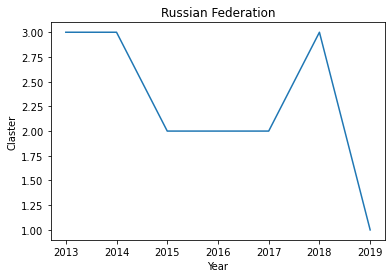

In [91]:
country = "Russian Federation"
pack37_labels_nrm[country].plot()
plt.title(country)
plt.xlabel('Year')
plt.ylabel('Claster')

Text(0, 0.5, 'Claster')

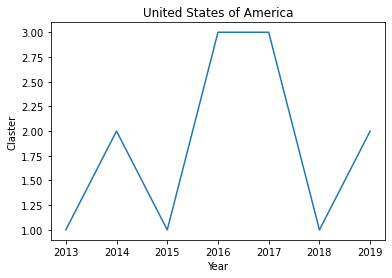

In [92]:
country = "United States of America"
pack37_labels_nrm[country].plot()
plt.title(country)
plt.xlabel('Year')
plt.ylabel('Claster')

Исходный датасет

In [93]:
#датасет с классами стран
pack37_labels = pd.DataFrame()
lebels_2013 = pd.Series(data = pack37_kmeans_labels['2013'].labels_, index = pack37['2013'].columns[2:], name = '2013')
lebels_2014 = pd.Series(data = pack37_kmeans_labels['2014'].labels_,index = pack37['2014'].columns[2:], name = '2014')
lebels_2015 = pd.Series(data = pack37_kmeans_labels['2015'].labels_,index = pack37['2015'].columns[2:], name = '2015')
lebels_2016 = pd.Series(data = pack37_kmeans_labels['2016'].labels_,index = pack37['2016'].columns[2:], name = '2016')
lebels_2017 = pd.Series(data = pack37_kmeans_labels['2017'].labels_,index = pack37['2017'].columns[2:], name = '2017')
lebels_2018 = pd.Series(data = pack37_kmeans_labels['2018'].labels_,index = pack37['2018'].columns[2:], name = '2018')
lebels_2019 = pd.Series(data = pack37_kmeans_labels['2019'].labels_,index = pack37['2019'].columns[2:], name = '2019')
pack37_labels = pack37_labels.append([lebels_2013,lebels_2014,lebels_2015,lebels_2016, lebels_2017,lebels_2018, lebels_2019])
pack37_labels += 1
#pack37_labels.fillna(0, inplace = True)
pack37_labels

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013      1.0      3.0     3.0        1.0      1.0        2.0      2.0   
2014      2.0      2.0     2.0        2.0      2.0        1.0      1.0   
2015      2.0      2.0     2.0        2.0      2.0        1.0      1.0   
2016      3.0      3.0     2.0        3.0      3.0        2.0      2.0   
2017      1.0      3.0     NaN        1.0      1.0        2.0      2.0   
2018      3.0      1.0     NaN        3.0      3.0        2.0      2.0   
2019      3.0      2.0     NaN        3.0      3.0        1.0      1.0   

      Azerbaijan  Bahrain  Bangladesh  ...  South Sudan  \
2013         3.0      1.0         3.0  ...          NaN   
2014         2.0      1.0         2.0  ...          3.0   
2015         2.0      1.0         2.0  ...          3.0   
2016         3.0      2.0         3.0  ...          1.0   
2017         1.0      1.0         3.0  ...          NaN   
2018         3.0      3.0         1.0  ...          NaN   
2019         3.0      3.0         2.0  ...          NaN   

      Democratic Republic of Timor-Leste  Tokelau  Tonga  Turkmenistan  \
2013                                 NaN      NaN    NaN           NaN   
2014                                 3.0      3.0    3.0           3.0   
2015                                 3.0      3.0    3.0           3.0   
2016                                 1.0      1.0    1.0           1.0   
2017                                 NaN      NaN    NaN           NaN   
2018                                 NaN      NaN    NaN           NaN   
2019                                 NaN      NaN    NaN           NaN   

      Turks and Caicos Islands  Tuvalu  Vanuatu  Virgin Islands, British  \
2013                       NaN     NaN      NaN                      NaN   
2014                       3.0     3.0      3.0                      3.0   
2015                       3.0     3.0      3.0                      3.0   
2016                       1.0     1.0      1.0                      1.0   
2017                       NaN     NaN      NaN                      NaN   
2018                       NaN     NaN      NaN                      NaN   
2019                       NaN     NaN      NaN                      NaN   

      Virgin Islands, U.S.  
2013                   NaN  
2014                   3.0  
2015                   3.0  
2016                   1.0  
2017                   NaN  
2018                   NaN  
2019                   NaN  

[7 rows x 224 columns]

In [94]:
#датасет с классами стран
pack37_labels = pd.DataFrame()
lebels_2013 = pd.Series(data = pack37_kmeans_labels['2013'].labels_, index = pack37['2013'].columns[2:], name = '2013')
lebels_2014 = pd.Series(data = pack37_kmeans_labels['2014'].labels_,index = pack37['2014'].columns[2:], name = '2014')
lebels_2015 = pd.Series(data = pack37_kmeans_labels['2015'].labels_,index = pack37['2015'].columns[2:], name = '2015')
lebels_2016 = pd.Series(data = pack37_kmeans_labels['2016'].labels_,index = pack37['2016'].columns[2:], name = '2016')
lebels_2017 = pd.Series(data = pack37_kmeans_labels['2017'].labels_,index = pack37['2017'].columns[2:], name = '2017')
lebels_2018 = pd.Series(data = pack37_kmeans_labels['2018'].labels_,index = pack37['2018'].columns[2:], name = '2018')
lebels_2019 = pd.Series(data = pack37_kmeans_labels['2019'].labels_,index = pack37['2019'].columns[2:], name = '2019')
pack37_labels = pack37_labels.append([lebels_2013,lebels_2014,lebels_2015,lebels_2016, lebels_2017,lebels_2018, lebels_2019])
pack37_labels.fillna(0, inplace = True)
pack37_labels += 1

Text(0, 0.5, 'Claster')

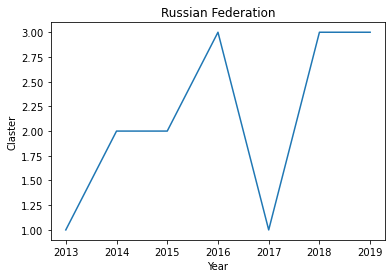

In [95]:
country = "Russian Federation"
pack37_labels[country].plot()
plt.title(country)
plt.xlabel('Year')
plt.ylabel('Claster')

Text(0, 0.5, 'Claster')

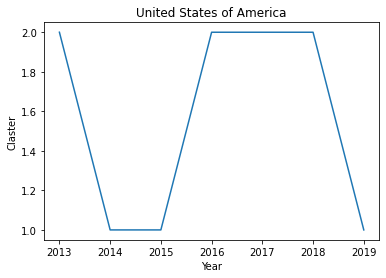

In [96]:
country = "United States of America"
pack37_labels[country].plot()
plt.title(country)
plt.xlabel('Year')
plt.ylabel('Claster')

In [97]:
#Составляю словарь с нумерации страны
col_list = list()
col_dict = {}

for ds in pack37.keys():
    for col in pack37[ds].columns[2:]:
        col_list.append(col)
col_list = list(unique_everseen(col_list))

i = 0
for col in col_list:
    col_dict[col] = i
    i += 1

country_ind = pd.DataFrame(data = None, columns = list(col_dict.keys()), index = pack37.keys())
country_dict = {}
err_list = []

for ds in pack37.keys():
    for col in country_ind.loc[ds].index:
        if col in pack37[ds].columns:
            country_ind.loc[ds][col] = col_dict[col]
        else: 
            err_list.append(col)
            country_ind[col].loc[ds] = np.nan

Гипотеза 1: Изменнее показателей pack 37 оказывает влияние на кластер страны. Если гипотеза верна, то существуют такие показатели из pack 37, которые оказывают наибольшее влияние на изменение кластера страны.

In [98]:
def prep_dfs(dict_df,df_lab, year1, year2, class1, class2):
    
    if check_class(df_lab, class1, class2) == False:
        print('Проверьте классы')
        return 
    
    country_y1_y2 = []
    country1  = list(df_lab.loc[year1][df_lab.loc[year1] == class1].index)
    country2  = list(df_lab.loc[year1][df_lab.loc[year2] == class2].index)
    for country in country1:
        if country in country2:
            country_y1_y2.append(country)
    year1 = str(year1)
    year2 = str(year2)
    temp_pack37 = dict_df[year1][country_y1_y2] - dict_df[year2][country_y1_y2]
    temp_pack37.dropna(axis = 0, inplace = True)
    return temp_pack37

In [99]:
# функция возврящает индексы показатеоей по правилу Паретто: возвращает индексы датафрейма и наименование страны
# на вход подаётся датафрейм сразницей показателей
def significant_parameters(df):
    dict_param = {}
    for df_columns in df:
        f = []
        temp_df = df[df_columns].loc[df[df_columns] < 0].sort_values(ascending=True)
        summa = temp_df.iloc[0]
        f.append(df[df_columns].loc[df[df_columns] < 0].sort_values(ascending=True).index[0])          
        for ind in range(1, len(df.index)):
            if summa / temp_df.sum() <= .8:
                summa += temp_df.iloc[ind]
                f.append(list(temp_df.index)[ind])
            else:
                break
        dict_param[df_columns] = f
    return dict_param

In [100]:
#функция проверяет нахождение введённых классов в диапазоне классов стран
def check_class(df, cl1, cl2):
     #pack37_labels
        
    a = df.max().sort_values(ascending = False)[0]
    b = df.min().sort_values(ascending = False)[-1]
    if cl1 > a:
        print(cl1, 'больше максимального.')
    elif  cl2 < b:
        print(cl2, 'меньше минимального.')
        return False
    return True

In [101]:
#Модель работает по алгоритму:
# из датасета pack37[year1] и pack37[year2] берёт датасет страны class1 и class2 соотвественно котрые есть в обоих годах
# затем вычитает эти два датасета
# после вычета берёт индексы показателей сумма показателей которых >= 80% от суммы показателей страны для каждой страы
# и возвращает эти показатели

sign_par = {}
year1 = 2014 #year1 должен быть > year2 и находится в диапахоне от 2013 до 2019
year2 = 2013
class1 = 6 #кластер в year1
class2 = 5 #кластер в year2

#Объекты содержащие кластеры:
#gii_labels
#pack37_labels,
#gii_gni_labels10

temp_pack37 = prep_dfs(pack37, gii_gni_labels10, year1, year2, class1, class2)

sign_par = significant_parameters(temp_pack37)

year1 = str(year1)
year2 = str(year2)
if bool(sign_par) == True:
    for key in sign_par:
        print(key)
        print(pack37[year1]['Indicator'].loc[sign_par[key]], '\n')
else:
       print('Стран с такими параметрами не найдено')

Georgia
79              Foreign direct investment net inflows
74    Patent families filed in at least three offices
73             Joint venture/strategic alliance deals
Name: Indicator, dtype: object 

Guyana
73             Joint venture/strategic alliance deals
52    Microfinance institutions' gross loan portfolio
74    Patent families filed in at least three offices
Name: Indicator, dtype: object 

Jamaica
73             Joint venture/strategic alliance deals
52    Microfinance institutions' gross loan portfolio
Name: Indicator, dtype: object 

Kazakhstan
79              Foreign direct investment net inflows
54                       Ease of protecting investors
52    Microfinance institutions' gross loan portfolio
Name: Indicator, dtype: object 

Lebanon
79              Foreign direct investment net inflows
73             Joint venture/strategic alliance deals
74    Patent families filed in at least three offices
17                       Ease of resolving insolvency
Name: Indicator,

In [102]:
#частотность параметров в выборке
list_param = []
indicator = str
for key in sign_par.keys():
    for i in range(0, len(sign_par[key])):
        list_param.append(sign_par[key][i])

        
print('Стран в выборке:', len(sign_par.keys()), '\n')
if len(sign_par.keys()) != 0:
    print('Частота показателей \n[показатель: частота]:\n')
for i in set(list_param):
    indicator = pack37[year1]['Indicator'][i]
    print('{0}: {1} - {2}'.format(i, list_param.count(i), indicator))

Стран в выборке: 7 

Частота показателей 
[показатель: частота]:

73: 6 - Joint venture/strategic alliance deals
74: 3 - Patent families filed in at least three offices
42: 1 - Logistics performance
79: 3 - Foreign direct investment net inflows
17: 1 - Ease of resolving insolvency
52: 4 - Microfinance institutions' gross loan portfolio
54: 1 - Ease of protecting investors
25: 2 - Pupil-teacher ratio, secondary
28: 1 - Graduates in science and engineering


--------

Доделать:  
1) Добавить выборку по стране  
2) Выборку 3 показателя страны  
3) Проверку введённых годов в диапазон  
4) Сортировку частотности показателей по убыванию

---